Importing Libraries 

In [175]:
# Importing all the libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [176]:
# Loading Dataset

wine= pd.read_csv('winequality.csv')

In [177]:
# Glimpse of data

wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [178]:
# Info about data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [179]:
## Checking for nan values

wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [180]:
wine.dropna(inplace=True)

### Visualizations to check the distribution of data

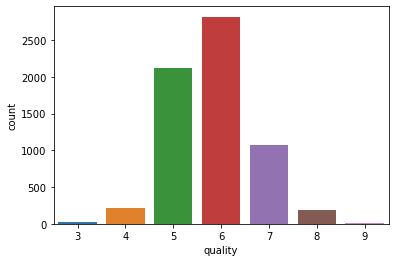

In [181]:
## plotting the target values
sns.countplot(wine['quality'])
plt.show()

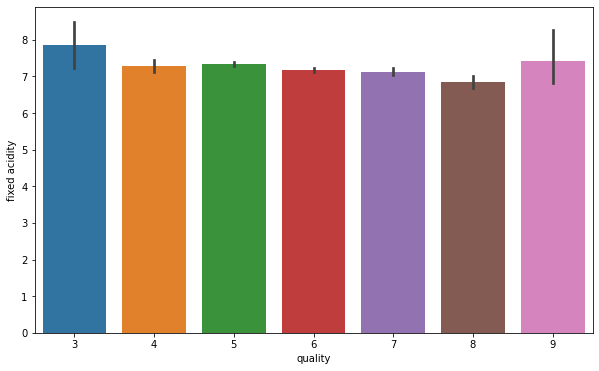

In [182]:
# Lets first examine the effect of fixed acidity on the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

From the above figure we can conclude that fixed acidity doesnt affect the quality of wine much.

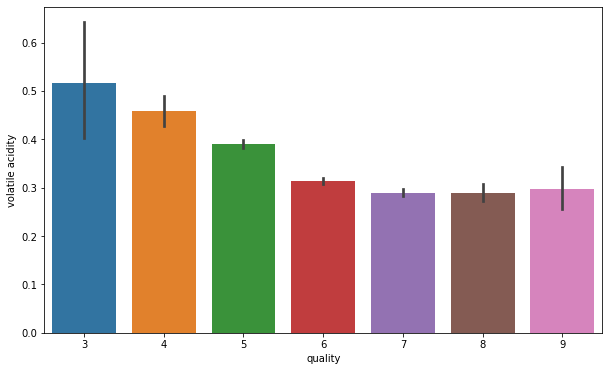

In [183]:
# Examine the effect of volatile acidity on the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

The Quality of wine decreases when the volatile acidity increases 

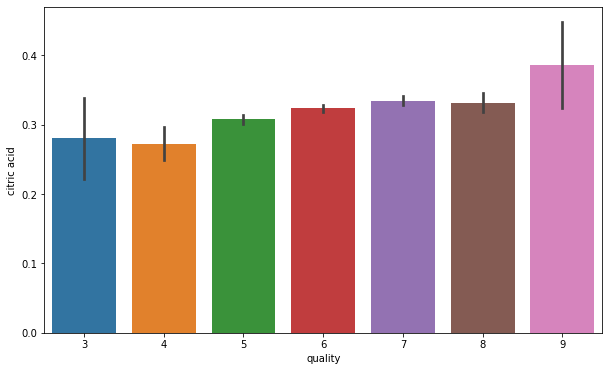

In [184]:
# Quality of wine with respect to citric acid

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

The quality of wine increases as the composition of citric acid increases 

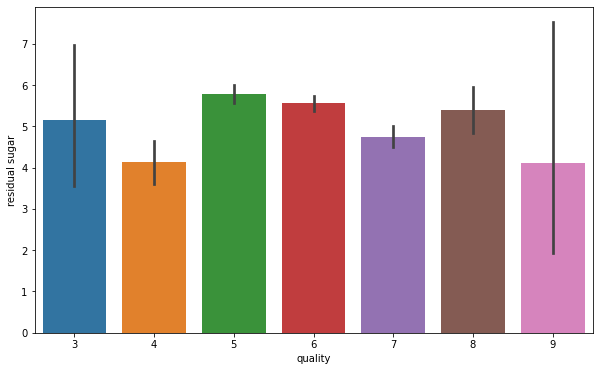

In [185]:
# Relation between residual sugar and wine quality 



fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

There is not much effect of residual sugar on quality of wine

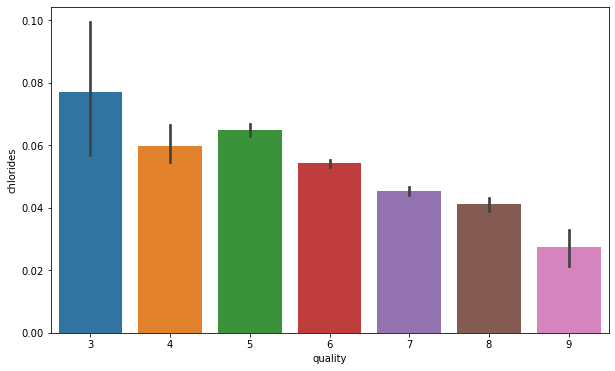

In [186]:
# Quality of wine with respect to chloride

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

The composition of chloride goes down as the quality of wine increases

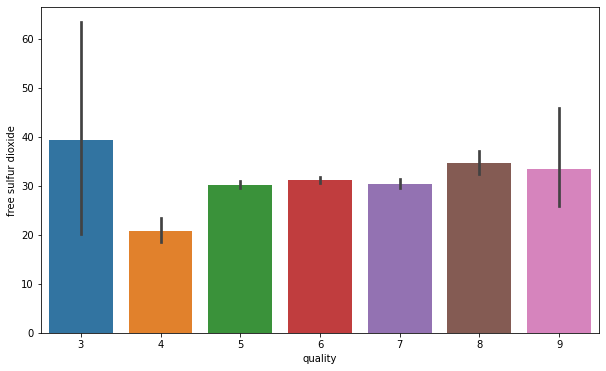

In [187]:
# Relation between free sulfur dioxide and wine quality

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

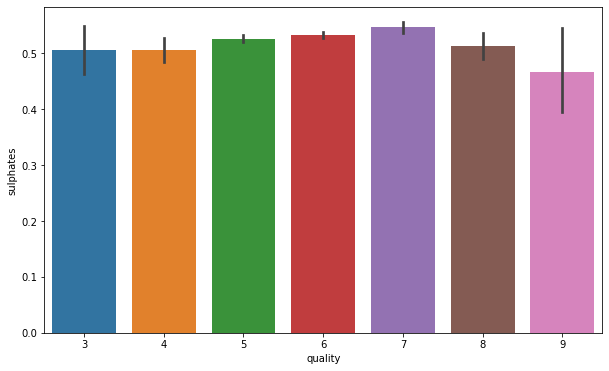

In [188]:
# Quality of wine with respect to sulphates

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

The sulphates level go higher with the quality of wine.

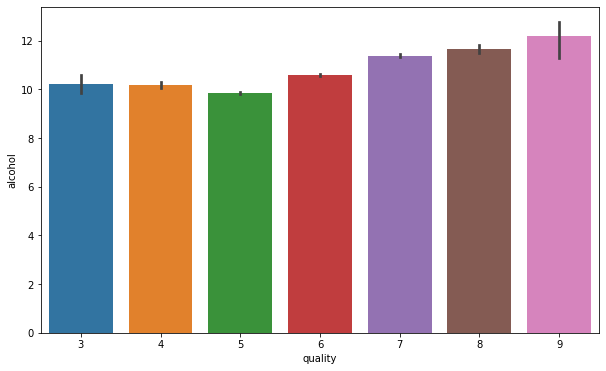

In [189]:
# Relation between alcohol level and wine quality

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

Alcohol level also goes higher as the quality of wine increases

### Data Preprocessing

In [194]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality

group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], 2, labels = group_names)

In [195]:
#Bad becomes 0 and good becomes 1 
le = LabelEncoder()
wine['quality']=le.fit_transform(wine['quality'])

In [196]:
wine['quality'].value_counts()

0    5192
1    1271
Name: quality, dtype: int64

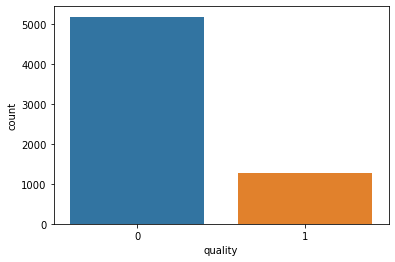

In [197]:
sns.countplot(wine['quality'])

In [198]:
# Performing one hot encoding on type column
df= wine.copy()
df= pd.get_dummies(wine.type, prefix='type', drop_first=True)
wine= wine.join(df)
wine.drop(['type'], axis=1, inplace=True)

In [199]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [200]:
# Scaling the feature variables
sc = StandardScaler()
x = sc.fit_transform(X)

In [201]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Making Models

#### Random Forest Classifier 

In [203]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [204]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1022
           1       0.80      0.55      0.65       271

    accuracy                           0.88      1293
   macro avg       0.84      0.76      0.79      1293
weighted avg       0.87      0.88      0.87      1293



Random forest gives the accuracy of 87%

In [205]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[984  38]
 [121 150]]


#### Support Vector Classifier

In [206]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [207]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1022
           1       0.72      0.35      0.47       271

    accuracy                           0.84      1293
   macro avg       0.79      0.66      0.69      1293
weighted avg       0.82      0.84      0.81      1293



Support vector classifier gets 81%

In [208]:
# Using Grid Search CV to increase the accuracy of model

#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [209]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [210]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.4, 'kernel': 'rbf'}

In [211]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1022
           1       0.73      0.47      0.57       271

    accuracy                           0.85      1293
   macro avg       0.80      0.71      0.74      1293
weighted avg       0.84      0.85      0.84      1293



##### After grid search cv we get an accuracy of 84%